In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [73]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)

In [74]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [75]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [76]:
loj_model = LogisticRegression(solver="liblinear").fit(X,y)

In [77]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [78]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [79]:
y_pred = loj_model.predict(X)

In [80]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [81]:
accuracy_score(y,y_pred)

0.7747395833333334

In [82]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



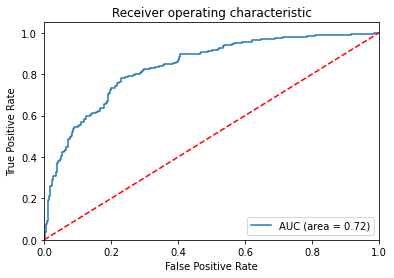

In [83]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))
fpr,tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

# model tuning

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [85]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [86]:
y_pred = loj_model.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [88]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7661231884057971

# K En Yakın Komşu

In [89]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [90]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [91]:
knn_model

KNeighborsClassifier()

In [92]:
y_pred = knn_model.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# model tuning

In [100]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [101]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [102]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [103]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

In [94]:
knn = KNeighborsClassifier()

In [30]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [95]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [96]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [33]:
#final model

In [97]:
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)

In [35]:
y_pred = knn_tuned.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [37]:
#accuracy sonucu için bir başka yol
knn_tuned.score(X_test,y_test)

0.7316017316017316

# Destek Vektör Makineleri (SVM)

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [106]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [107]:
y_pred = svm_model.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# model tuning

In [109]:
svm = SVC()

In [110]:
svm_params = {"C": np.arange(1,10),"kernel":["linear","rbf"]}

In [111]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [46]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [112]:
svm_tuned = SVC(C=2,kernel="linear").fit(X_train,y_train)

In [113]:
y_pred = svm_tuned.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# Random Forest

In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [118]:
rf = RandomForestClassifier()

In [119]:
rf_params = {"n_estimators": [100,200,500,1000],#kullanılacak ağaç sayısı
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [120]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [58]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}

In [59]:
#final model

In [60]:
rf_tuned = RandomForestClassifier(max_features=8,min_samples_split=5,n_estimators=100).fit(X_train,y_train)

In [61]:
y_pred = rf_tuned.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [63]:
#değişkenlerin önem düzeyi

In [64]:
rf_tuned.feature_importances_

array([0.05302755, 0.37578798, 0.07437912, 0.04297736, 0.04631094,
       0.16399553, 0.11537151, 0.12815001])

In [65]:
feature_imp = pd.Series(rf_tuned.feature_importances_,index = X_train.columns).sort_values(ascending=False)

In [66]:
feature_imp

Glucose                     0.375788
BMI                         0.163996
Age                         0.128150
DiabetesPedigreeFunction    0.115372
BloodPressure               0.074379
Pregnancies                 0.053028
Insulin                     0.046311
SkinThickness               0.042977
dtype: float64

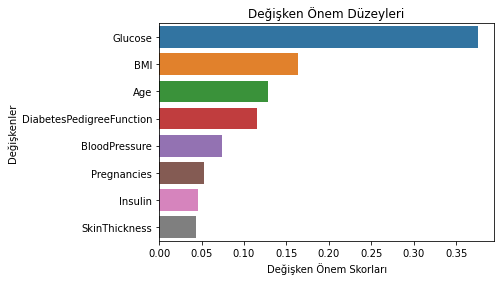

In [67]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()